In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df_cleaned = df.drop(columns=['Id','Species'])

In [4]:
df_cleaned.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [5]:
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)

In [6]:
IQR = Q3-Q1

In [7]:
lower_bound = Q1 -1.5* IQR
upper_bound = Q3 + 1.5 *IQR

In [9]:
outliers = ((df_cleaned < lower_bound )| (df_cleaned > upper_bound)).sum()

In [10]:
outliers

SepalLengthCm    0
SepalWidthCm     4
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [13]:
df_no_outliers = df_cleaned[~((df_cleaned < lower_bound ) | (df_cleaned > upper_bound)).any(axis=1)]

In [14]:
df_no_outliers.shape

(146, 4)

In [19]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_outliers)

In [21]:
pd.DataFrame(df_scaled , columns=df_no_outliers.columns).head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.910515,1.175789,-1.374878,-1.345899
1,-1.151122,-0.093924,-1.374878,-1.345899
2,-1.391729,0.413961,-1.431986,-1.345899
3,-1.512032,0.160019,-1.317771,-1.345899
4,-1.030819,1.429732,-1.374878,-1.345899


In [22]:
inertia =[]
K = range(1,11)

In [25]:
for k in K :
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

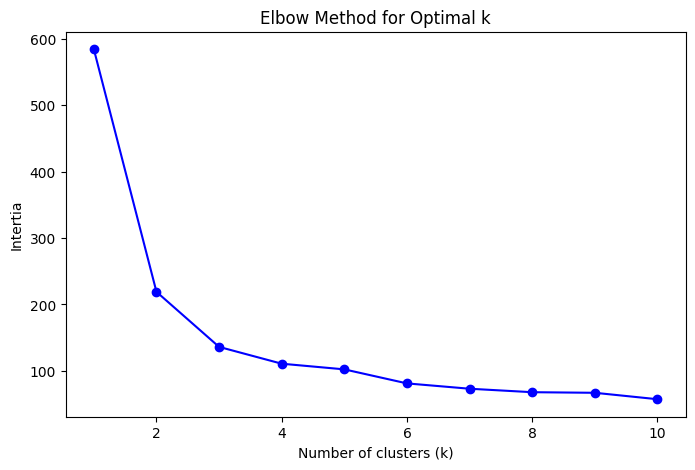

In [27]:
plt.figure(figsize=(8,5))
plt.plot(K,inertia,'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Intertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [29]:
kmeans_3 = KMeans(n_clusters=3,random_state=42)
df_no_outliers['Cluster_3'] = kmeans_3.fit_predict(df_scaled)

C:\Users\jaswa\AppData\Local\Temp\ipykernel_17076\3495801941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Cluster_3'] = kmeans_3.fit_predict(df_scaled)


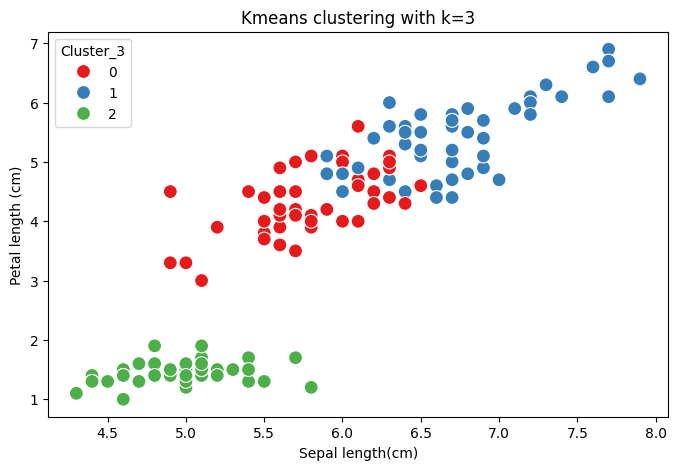

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_no_outliers['SepalLengthCm'],
                y=df_no_outliers['PetalLengthCm'],
                hue=df_no_outliers['Cluster_3'],
                palette='Set1',
                s=100)
plt.title('Kmeans clustering with k=3')
plt.xlabel('Sepal length(cm)')
plt.ylabel('Petal length (cm)')
plt.show()